# r book MapMyRun data

In [1]:
.libPaths(c("C:/Software/rLibrary"))

In [2]:
install.packages("lubridate")
install.packages("readr")
install.packages("ggplot2")
install.packages("reshape2")
install.packages("dplyr")
install.packages("RODBC")
install.packages("tidyverse")

package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpSUqoXJ\downloaded_packages
package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpSUqoXJ\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpSUqoXJ\downloaded_packages
package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpSUqoXJ\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpSUqoXJ\downloaded_packages
package 'RODBC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\RtmpSUqoXJ\downloaded_packages
package

In [3]:
lema_UN <- readLines("C:/Users/coleb/OneDrive/Cosmo/Db2.txt")[1]
lema_pw <- readLines("C:/Users/coleb/OneDrive/Cosmo/Db2.txt")[2]
lema_server <- readLines("C:/Users/coleb/OneDrive/Cosmo/Db2.txt")[3]
lema <- odbcConnect(lema_server, uid = lema_UN, pwd = lema_pw)

Warning message in readLines("C:/Users/coleb/OneDrive/Cosmo/Db2.txt"):
"incomplete final line found on 'C:/Users/coleb/OneDrive/Cosmo/Db2.txt'"
Warning message in readLines("C:/Users/coleb/OneDrive/Cosmo/Db2.txt"):
"incomplete final line found on 'C:/Users/coleb/OneDrive/Cosmo/Db2.txt'"
Warning message in readLines("C:/Users/coleb/OneDrive/Cosmo/Db2.txt"):
"incomplete final line found on 'C:/Users/coleb/OneDrive/Cosmo/Db2.txt'"


ERROR: Error in odbcConnect(lema_server, uid = lema_UN, pwd = lema_pw): could not find function "odbcConnect"


In [12]:
# SQL for MAP Ach and Req
Req_query <- paste0("SELECT
                      * from MAPMYRUNS")

In [13]:
MAP_Req <- as.data.table(sqlQuery(lema, Req_query))

In [14]:
head(MAP_Req)

DATE,DISTANCE,DURATION,ACTIVITY_SCORE,AVGHR,STEPSY,CALBURNED
<date>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2022-07-18,9.00,95.15,57.01286,143,14918,1175
2022-07-17,3.10,26.55,58.67957,0,4286,404
2022-07-14,3.76,35.95,74.44854,148,5684,452
2022-07-13,3.11,31.87,73.20733,150,4991,398
2022-07-12,3.11,32.80,68.74034,155,5134,421
2022-07-10,3.10,38.35,47.92118,149,5125,429


In [21]:
df <- read.csv("C:/Users/coleb/OneDrive/Cosmo/Datasets/Apple Health Project/Jul21-Jul22/HealthView_7-14-21_7-20-22.csv", header=TRUE)

In [22]:
nrow(df)

[1] 401

In [23]:
head(df, 5)

,Date,BLOOD.OXYGEN....,BODY.FAT....,BODY.MASS.INDEX,BODY.TEMPERATURE..degF.,BURNED.CALORIES..kcal.,DISTANCE..R.W...mi.,EXERCISE.MINUTES,HEART.RATE..bpm.,HEART.RATE.VARIABILITY..ms.,NET.CALORIES..kcal.,RESTING.CALORIES..kcal.,RESTING.HEART.RATE..bpm.,SLEEP,STEPS,TOTAL.CALORIES..kcal.,WALKING.HEART.RATE..bpm.,WEIGHT..lbs.,WORKOUTS,DURATION
,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,7/14/21,,NA,NA,NA,564.76,5.22,25m,103.84,79.88,2511.17,1946.40,46,1h 10m,10324,2511.17,69,NA,,
2,7/15/21,,NA,NA,NA,619.46,5.00,41m,81.34,91.68,2589.15,1969.69,40,9h 10m,10001,2589.15,72,NA,,
3,7/16/21,,NA,NA,NA,686.13,5.25,48m,75.10,89.51,2694.58,2008.45,40,7h 55m,10870,2694.58,89,NA,,
4,7/17/21,,NA,NA,NA,1043.06,8.71,1h 48m,106.00,86.12,2999.42,1956.36,40,2h 10m,16766,2999.42,74,NA,Running,29m
5,7/18/21,,NA,NA,NA,471.30,3.48,10m,73.61,77.00,2450.34,1979.05,40,6h 30m,7251,2450.34,NA,NA,,


In [24]:
# df <- separate(data = df, col = Date.Submitted, into = c("left", "middle", "right"), sep = " ")

In [25]:
#write.csv(df, "apple_data.csv")

In [26]:
summary(df)

     Date           BLOOD.OXYGEN....    BODY.FAT....   BODY.MASS.INDEX
 Length:401         Length:401         Min.   :18.90   Min.   :25.00  
 Class :character   Class :character   1st Qu.:19.60   1st Qu.:25.51  
 Mode  :character   Mode  :character   Median :19.93   Median :25.70  
                                       Mean   :19.86   Mean   :25.63  
                                       3rd Qu.:20.15   3rd Qu.:25.80  
                                       Max.   :20.40   Max.   :26.00  
                                       NA's   :385     NA's   :379    
 BODY.TEMPERATURE..degF. BURNED.CALORIES..kcal. DISTANCE..R.W...mi.
 Mode:logical            Min.   :   1.88        Min.   : 0.510     
 NA's:401                1st Qu.: 348.63        1st Qu.: 2.160     
                         Median : 514.51        Median : 4.575     
                         Mean   : 556.74        Mean   : 4.754     
                         3rd Qu.: 766.14        3rd Qu.: 6.415     
                        

In [27]:
df <- data.frame(df)

In [28]:
nrow(df)

[1] 401

In [29]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
run_data <- data.frame(df)

In [30]:
# df %>% mutate(Workout.date = Workout.Date %>% as.Date("%B %d, %Y"), left = month(Workout.Date, abbr = FALSE, label = TRUE))

In [31]:
# #convert the datetime variables using the following logic:
# #%B is a complete month name (November), %e is a day of the month (3) preceded by a space and followed by a comma and a space, and %Y is a four-digit year (2020).
# df$Workout.Date <- as.Date(df$Workout.Date, format = "%B %e, %Y")
# df$Date.Submitted <- as.Date(df$Date.Submitted, format = "%B %e, %Y")

In [33]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Date=mdy(Date))
df <- data.frame(df)

In [40]:
head(df, 5)
df <- df %>% mutate(Date=as.Date(Date))
df <- data.frame(df)


,Date,BLOOD.OXYGEN....,BODY.FAT....,BODY.MASS.INDEX,BODY.TEMPERATURE..degF.,BURNED.CALORIES..kcal.,DISTANCE..R.W...mi.,EXERCISE.MINUTES,HEART.RATE..bpm.,HEART.RATE.VARIABILITY..ms.,NET.CALORIES..kcal.,RESTING.CALORIES..kcal.,RESTING.HEART.RATE..bpm.,SLEEP,STEPS,TOTAL.CALORIES..kcal.,WALKING.HEART.RATE..bpm.,WEIGHT..lbs.,WORKOUTS,DURATION
,<date>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2021-07-14,,NA,NA,NA,564.76,5.22,25m,103.84,79.88,2511.17,1946.40,46,1h 10m,10324,2511.17,69,NA,,
2,2021-07-15,,NA,NA,NA,619.46,5.00,41m,81.34,91.68,2589.15,1969.69,40,9h 10m,10001,2589.15,72,NA,,
3,2021-07-16,,NA,NA,NA,686.13,5.25,48m,75.10,89.51,2694.58,2008.45,40,7h 55m,10870,2694.58,89,NA,,
4,2021-07-17,,NA,NA,NA,1043.06,8.71,1h 48m,106.00,86.12,2999.42,1956.36,40,2h 10m,16766,2999.42,74,NA,Running,29m
5,2021-07-18,,NA,NA,NA,471.30,3.48,10m,73.61,77.00,2450.34,1979.05,40,6h 30m,7251,2450.34,NA,NA,,


In [52]:
library(dplyr)
df2 <- df[rev(order(df$Date)),]

In [54]:
head(df2, 25)

,Date,BLOOD.OXYGEN....,BODY.FAT....,BODY.MASS.INDEX,BODY.TEMPERATURE..degF.,BURNED.CALORIES..kcal.,DISTANCE..R.W...mi.,EXERCISE.MINUTES,HEART.RATE..bpm.,HEART.RATE.VARIABILITY..ms.,NET.CALORIES..kcal.,RESTING.CALORIES..kcal.,RESTING.HEART.RATE..bpm.,SLEEP,STEPS,TOTAL.CALORIES..kcal.,WALKING.HEART.RATE..bpm.,WEIGHT..lbs.,WORKOUTS,DURATION
,<date>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
401,2022-07-20,94 - 98,NA,NA,NA,1006.77,8.43,2h 4m,104.0,88.34,2668.15,1661.38,48,,13135,2668.15,96.0,NA,Running,1h 1m
400,2022-07-19,94 - 96,NA,NA,NA,25.33,1.38,,44.0,34.63,1662.31,1636.98,NA,3h 12m,3138,1662.31,NA,NA,,
399,2022-07-18,92 - 96,NA,NA,NA,1104.56,12.68,1h 36m,98.5,68.19,2836.11,1731.55,NA,4h 25m,23754,2836.11,NA,NA,Running,1h 35m
398,2022-07-17,92 - 99,NA,NA,NA,549.13,4.55,58m,106.5,127.65,2310.74,1761.61,38,7h 40m,8360,2310.74,89.0,NA,Running,26m
397,2022-07-16,93 - 97,NA,NA,NA,501.35,8.03,57m,94.5,71.24,2234.70,1733.35,39,8h 45m,9848,2234.70,NA,NA,Running,56m
396,2022-07-15,94 - 99,NA,NA,NA,418.81,2.97,5m,73.0,95.51,2290.69,1871.88,42,2h 50m,6428,2290.69,82.0,NA,,
395,2022-07-14,92 - 98,NA,NA,NA,454.21,7.33,38m,103.0,124.66,2133.59,1679.39,NA,5h 38m,14361,2133.59,65.0,NA,Running,35m
394,2022-07-13,92 - 98,NA,NA,NA,612.31,5.83,35m,107.0,102.45,2401.15,1788.83,47,2h 10m,10962,2401.15,88.0,NA,Running,32m
393,2022-07-12,93 - 98,NA,NA,NA,780.55,6.45,40m,106.0,89.51,2579.58,1799.03,50,7h 33m,12173,2579.58,85.0,NA,Running,33m


In [57]:
library(tidyr)
df <- df %>% drop_na("WORKOUTS")

In [58]:
nrow(df)

[1] 401

In [ ]:
names(run_data)[names(run_data) == "Workout.Date"] <- "Date"
names(run_data)[names(run_data) == "Date.Submitted"] <- "Date.Sub"
names(run_data)[names(run_data) == "Workout.Time..seconds."] <- "Duration"
names(run_data)[names(run_data) == "Distance..mi."] <- "Distance"
names(run_data)[names(run_data) == "minutes"] <- "minutes"
names(run_data)[names(run_data) == "Activity.Type"] <- "Activity"
names(run_data)[names(run_data) == "Avg.Pace..min.mi."] <- "Avg.Pace"
names(run_data)[names(run_data) == "Max.Pace..min.mi."] <- "Max.Pace"
names(run_data)[names(run_data) == "Avg.Speed..mi.h."] <- "Avg.Spd"
names(run_data)[names(run_data) == "Avg.Heart.Rate"] <- "Avg.HR"
names(run_data)[names(run_data) == "Max.Speed..mi.h."] <- "Max.Spd"
names(run_data)[names(run_data) == "Calories.Burned..kCal."] <- "Cal.Burned"
head(run_data, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,Notes,Source,Link,duration
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"July 20, 2022","July 20, 2022",Run,836,6.20000,3689,9.91667,0.00000,6.05042,0.000,NA,9775,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6725708821,61.48333
2,"July 18, 2022","July 18, 2022",Run,1175,9.00279,5709,10.56770,0.46046,5.67767,130.304,143,14918,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6720217687,95.15000


In [ ]:
df <- within(run_data, rm('Link', 'Notes', 'Source'))
#df$minutes <- round(df$minutes, digits = 2)

In [ ]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [ ]:
library(dplyr); df %>% mutate_if(is.numeric, round, digits=2)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,duration
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"July 20, 2022","July 20, 2022",Run,836,6.20,3689,9.92,0.00,6.05,0.00,NA,9775,61.48
"July 18, 2022","July 18, 2022",Run,1175,9.00,5709,10.57,0.46,5.68,130.30,143,14918,95.15
"July 17, 2022","July 17, 2022",Run,404,3.10,1593,8.56,0.00,7.01,0.00,NA,4286,26.55
"July 17, 2022","July 16, 2022",Run,405,3.10,1698,9.13,0.00,6.57,0.00,NA,4537,28.30
"July 14, 2022","July 14, 2022",Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95
"July 13, 2022","July 13, 2022",Run,398,3.11,1912,10.25,1.09,5.85,54.80,150,4991,31.87
"July 12, 2022","July 12, 2022",Run,421,3.11,1968,10.55,1.07,5.69,56.08,155,5134,32.80
"July 12, 2022","July 11, 2022",Run,197,2.00,1409,11.74,1.91,5.11,31.34,145,3302,23.48
"July 10, 2022","July 10, 2022",Run,429,3.10,2301,12.37,0.99,4.85,60.41,149,5125,38.35


In [ ]:
df <- df %>% drop_na(Date)
# df <- df %>% drop_na(Date.Sub)

In [ ]:
nrow(df)

[1] 704

In [ ]:
summary(df)

   Date.Sub             Date             Activity           Cal.Burned    
 Length:704         Length:704         Length:704         Min.   :   0.0  
 Class :character   Class :character   Class :character   1st Qu.: 228.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 403.0  
                                                          Mean   : 400.3  
                                                          3rd Qu.: 452.2  
                                                          Max.   :2473.0  
                                                                          
    Distance         Duration        Avg.Pace          Max.Pace      
 Min.   : 0.000   Min.   :    0   Min.   :  0.000   Min.   :  0.000  
 1st Qu.: 2.000   1st Qu.: 1456   1st Qu.:  9.057   1st Qu.:  0.000  
 Median : 3.100   Median : 1800   Median :  9.730   Median :  0.860  
 Mean   : 3.094   Mean   : 2408   Mean   : 12.998   Mean   :  2.077  
 3rd Qu.: 3.520   3rd Qu.: 2330   3rd Qu.: 11.043 

In [ ]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]

In [ ]:
HRmedian <- median(df$Avg.HR)
Stepsmedian <- median(df$Steps)

In [ ]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Date=mdy(Date))

In [ ]:
# df[is.na(df)] = 0

In [ ]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,duration
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"July 20, 2022",2022-07-20,Run,836,6.2,3689,9.92,0.00,6.05,0.0,NA,9775,61.48
2,"July 18, 2022",2022-07-18,Run,1175,9.0,5709,10.57,0.46,5.68,130.3,143,14918,95.15
3,"July 17, 2022",2022-07-17,Run,404,3.1,1593,8.56,0.00,7.01,0.0,NA,4286,26.55
4,"July 17, 2022",2022-07-16,Run,405,3.1,1698,9.13,0.00,6.57,0.0,NA,4537,28.30


In [ ]:
df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == 0, HRmedian, Avg.HR))
# #df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == NA, HRmean, Avg.HR))
df <- df %>% dplyr::mutate(Steps = ifelse(Steps == 0, Stepsmedian, Steps))
# #df <- df %>% dplyr::mutate(Steps = ifelse(Steps == NA, Stepsmean, Steps))

In [ ]:
df[is.na(df)] = 0

In [ ]:
# df[df == 0] = NA

In [ ]:
df$Avg.HR[is.na(df$Avg.HR)] <- median(df$Avg.HR, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- median(df$Steps, na.rm = TRUE)
df$Max.Pace[is.na(df$Max.Pace)] <- median(df$Max.Pace, na.rm = TRUE)
df$Avg.Pace[is.na(df$Avg.Pace)] <- median(df$Avg.Pace, na.rm = TRUE)
df$Max.Spd[is.na(df$Max.Spd)] <- median(df$Max.Spd, na.rm = TRUE)
df$Avg.Spd[is.na(df$Avg.Spd)] <- median(df$Avg.Spd, na.rm = TRUE)
df$Cal.Burned[is.na(df$Cal.Burned)] <- median(df$Cal.Burned, na.rm = TRUE)

In [ ]:
df$day <- weekdays(as.Date(df$Date))
df$month <- months(as.Date(df$Date))
df$year <- years(as.Date(df$Date))

In [ ]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,duration,day,month,year
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<ord>
1,"July 20, 2022",2022-07-20,Run,836,6.2,3689,9.92,0.00,6.05,0.0,0,9775,61.48,Wednesday,July,2022
2,"July 18, 2022",2022-07-18,Run,1175,9.0,5709,10.57,0.46,5.68,130.3,143,14918,95.15,Monday,July,2022
3,"July 17, 2022",2022-07-17,Run,404,3.1,1593,8.56,0.00,7.01,0.0,0,4286,26.55,Sunday,July,2022
4,"July 17, 2022",2022-07-16,Run,405,3.1,1698,9.13,0.00,6.57,0.0,0,4537,28.30,Saturday,July,2022


In [ ]:
library(ggplot2)

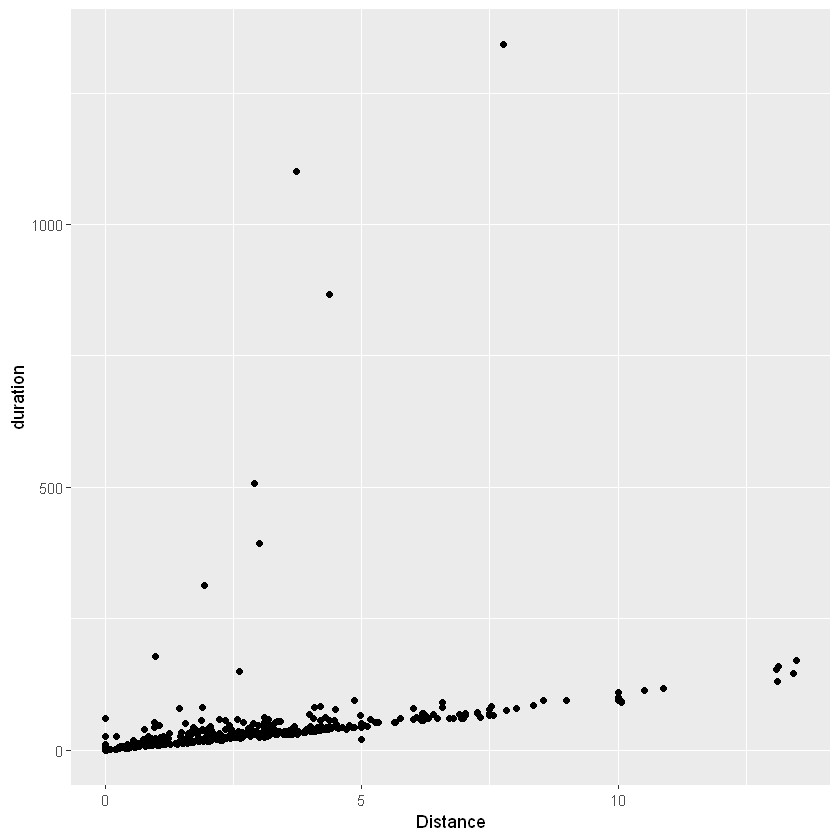

In [ ]:
ggplot(data = df, mapping = aes(x = Distance, y = duration)) + 
    geom_point()

In [ ]:
#Remove erroneous data (I know I have not run anything over 170 minutes)
df <- df[df$duration < 170,]
df <- df[df$Avg.Spd < 10,]
df <- df[df$Cal.Burned < 2000,]
df <- df[df$Date > '2019-01-01',]

In [ ]:
#Create subsets for years 2021 and 2022
df2022 <- df[df$Date.Sub >= "2022-01-01",]
df2021 <- subset(df, Date.Sub < "2022-01-01" & Date.Sub >= "2021-01-01")

In [ ]:
df$year <- format(df$Date.Sub, format = "%Y")
df$year <- as.integer(df$year)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [ ]:
tail(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,duration,day,month,year
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
697,"May 19, 2019",2019-05-19,Run,419,3.11,2197,11.69,2.06,5.13,29.17,139,5295,36.62,Sunday,May,NA
698,"May 15, 2019",2019-05-15,Indoor Run / Jog,403,3.13,2344,12.48,0.00,4.81,0.00,0,6926,39.07,Wednesday,May,NA
699,"May 13, 2019",2019-05-13,Run,258,1.96,1214,10.32,2.67,5.82,22.45,0,3209,20.23,Monday,May,NA
700,"May 13, 2019",2019-05-13,Indoor Run / Jog,191,1.42,927,10.88,17.09,5.51,3.51,158,67,15.45,Monday,May,NA


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

ERROR while rich displaying an object: Error: Continuous value supplied to discrete scale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj

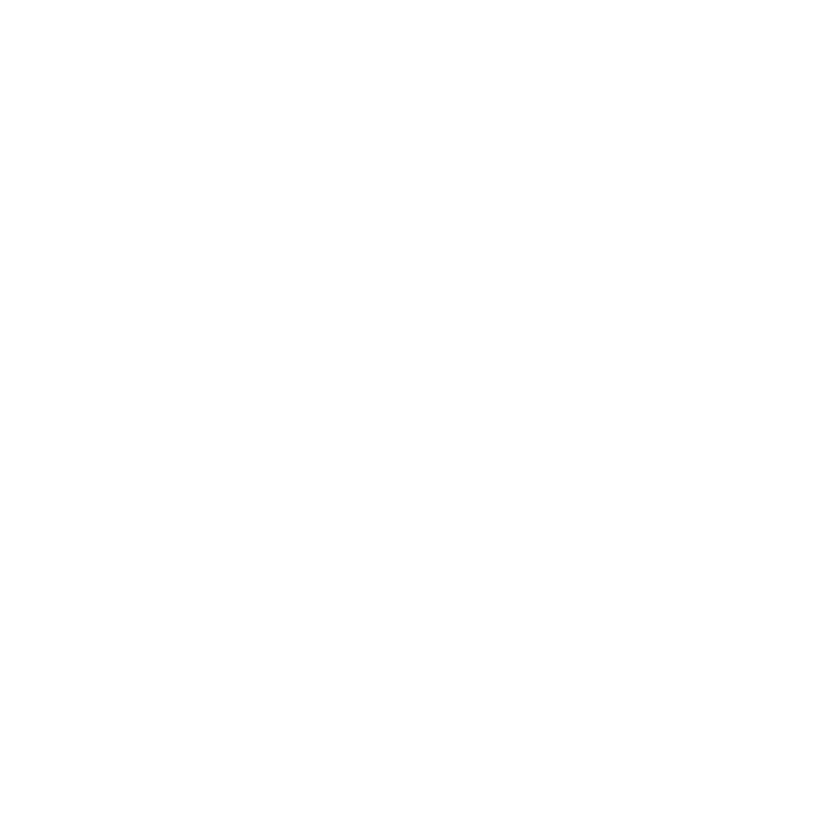

In [ ]:
ggplot(data = df, mapping = aes(x = Distance, y = duration, color = month)) + 
    geom_point() + geom_smooth(aes(color = year))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



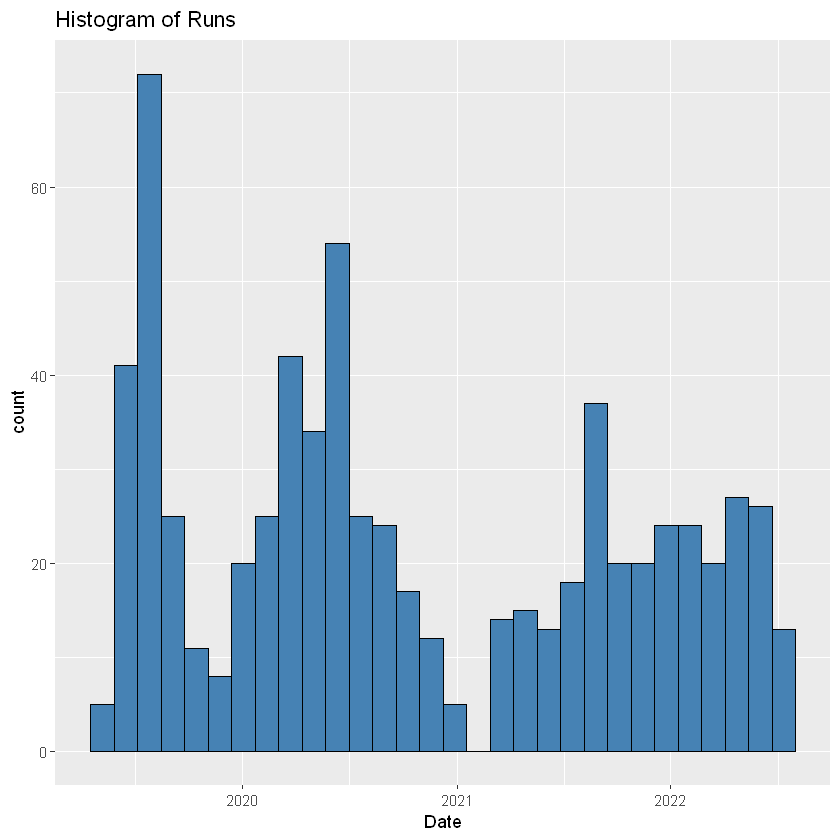

In [ ]:
library(ggplot2)
ggplot(data=df, aes(x=Date)) +
  geom_histogram(fill="steelblue", color="black") +
  ggtitle("Histogram of Runs")

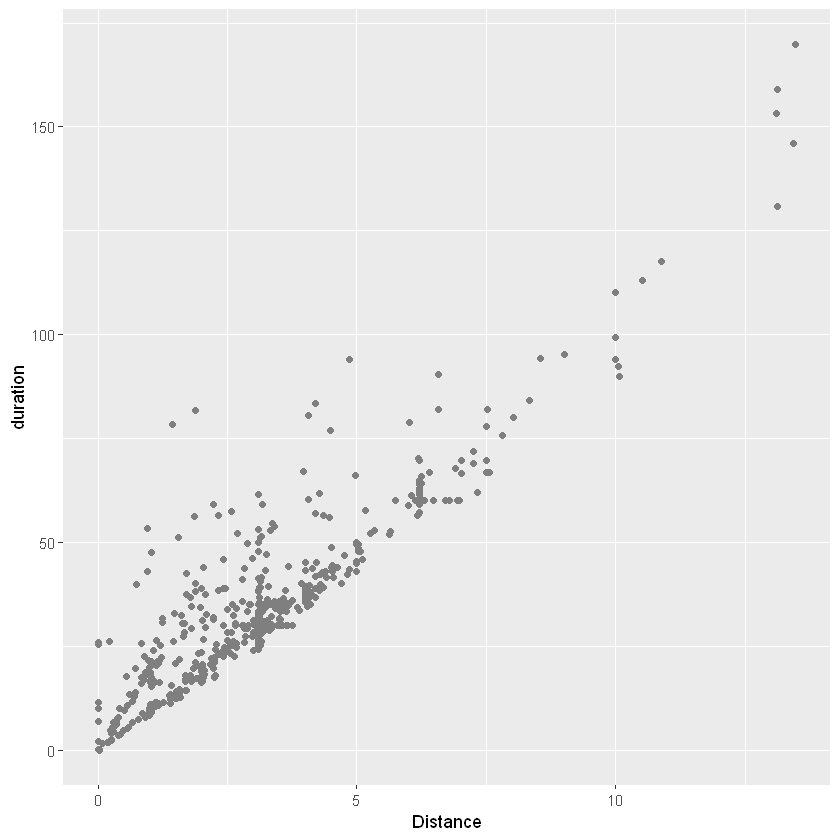

In [ ]:
ggplot(data=df, aes(x=Distance, y=duration, color=year)) + 
  geom_point()

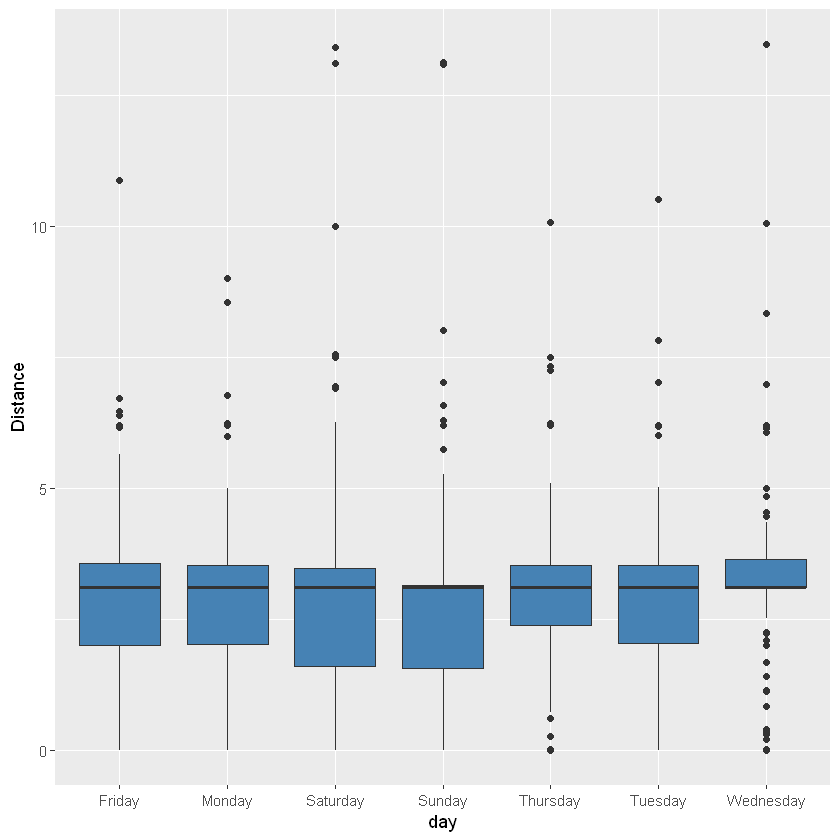

In [ ]:
ggplot(data=df, aes(x=day, y=Distance)) + 
  geom_boxplot(fill="steelblue")

In [ ]:
df <- df %>% mutate(new_bin = cut(Distance, breaks=c(0, 3.09, 6.21, 13.09, 15)))


In [ ]:
names(df)[names(df) == "new_bin"] <- "Miles"

In [ ]:
head(df, 1)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 20, 2022",2022-07-20,Run,836,6.2,3689,9.92,0,6.05,0,0,9775,61.48,Wednesday,July,NA,"(3.09,6.21]"


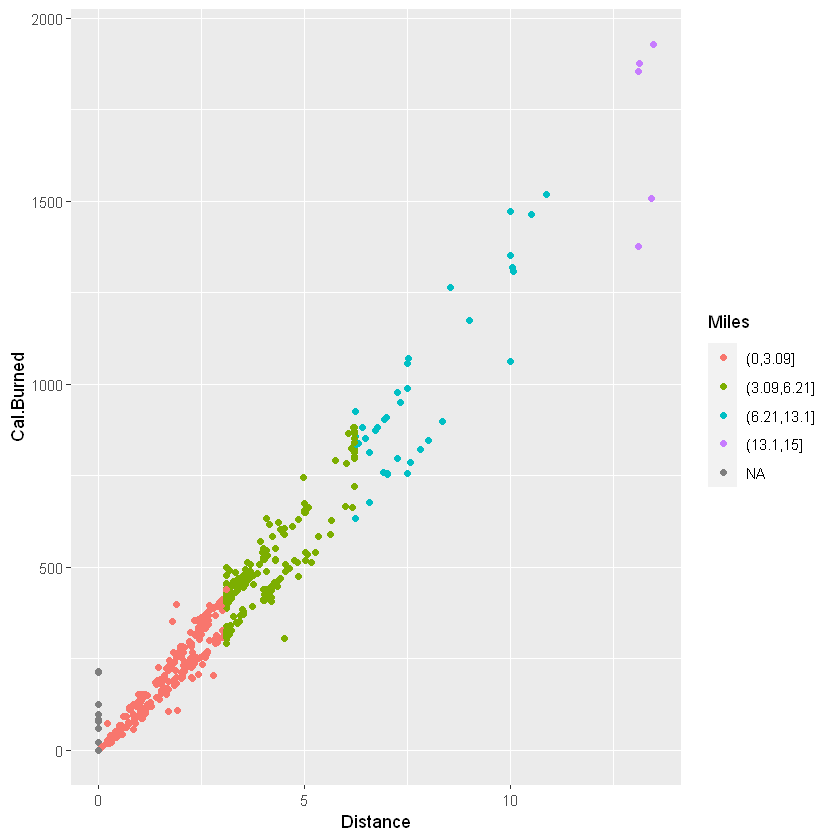

In [ ]:
ggplot(data=df, aes(x=Distance, y=Cal.Burned, color=Miles)) + 
  geom_point()

In [ ]:
sapply(df, function(x) sum(is.na(x)))
sapply(df, function(x) sum(duplicated(x)))


Date.Sub       Date   Activity Cal.Burned   Distance   Duration   Avg.Pace 
         0          0          0          0          0          0          0 
  Max.Pace    Avg.Spd  Max.Speed     Avg.HR      Steps   duration        day 
         0          0          0          0          0          0          0 
     month       year      Miles 
         0        691         19

Date.Sub       Date   Activity Cal.Burned   Distance   Duration   Avg.Pace 
       187        157        685        310        398        125        301 
  Max.Pace    Avg.Spd  Max.Speed     Avg.HR      Steps   duration        day 
       440        381        254        617         69        125        684 
     month       year      Miles 
       679        690        686

In [ ]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Speed,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 20, 2022",2022-07-20,Run,836,6.2,3689,9.92,0.00,6.05,0.0,0,9775,61.48,Wednesday,July,NA,"(3.09,6.21]"
2,"July 18, 2022",2022-07-18,Run,1175,9.0,5709,10.57,0.46,5.68,130.3,143,14918,95.15,Monday,July,NA,"(6.21,13.1]"
3,"July 17, 2022",2022-07-17,Run,404,3.1,1593,8.56,0.00,7.01,0.0,0,4286,26.55,Sunday,July,NA,"(3.09,6.21]"
4,"July 17, 2022",2022-07-16,Run,405,3.1,1698,9.13,0.00,6.57,0.0,0,4537,28.30,Saturday,July,NA,"(3.09,6.21]"


In [ ]:
nrow(df)

[1] 691